# Exploratory Data Analysis

### Importing necessary modules:

In [1]:
# For data processing
import pandas as pd
import numpy as np
import datetime as dt

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

We will utilize the `read_csv()` function from pandas to import the CSV files as dataframes into our notebook. This will facilitate working with the data more effectively.

In [2]:
path_to_client_data = r"/content/4.1 Client Data.csv"
path_to_price_data = r"/content/4.2 Price Data.csv"

In [3]:
client_df = pd.read_csv(path_to_client_data)
price_df = pd.read_csv(path_to_price_data)

Removing any leading or trailing spaces from column names of the dataframe.

In [4]:
client_df.rename(columns=lambda x: x.strip(), inplace=True)
price_df.rename(columns=lambda x: x.strip(), inplace=True)

Removing any leading or trailing spaces from column entries of the dataframe.

In [5]:
client_df = client_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
price_df = price_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

The `head(n)` function allows us to view the first `n` rows of the dataframe (defaults to 5). If we want to view the last `n` rows, we can use `tail(n)`.

In [6]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0



#### Data description:

`client_df.csv`
* **id** = client company identifier
* **channel_sales** = code of the sales channel
* **cons_12m** = electricity consumption of the past 12 months
* **cons_gas_12m** = gas consumption of the past 12 months
* **cons_last_month** = electricity consumption of the last month
* **date_activ** = date of activation of the contract
* **date_end** = registered date of the end of the contract
* **date_modif_prod** = date of the last modification of the product
* **date_renewal** = date of the next contract renewal
* **forecast_cons_12m** = forecasted electricity consumption for next 12 months
* **forecast_cons_year** = forecasted electricity consumption for the next calendar year
* **forecast_discount_energy** = forecasted value of current discount
* **forecast_meter_rent_12m** = forecasted bill of meter rental for the next 2 months
* **forecast_price_energy_off_peak** = forecasted energy price for 1st period (off peak)
* **forecast_price_energy_peak** = forecasted energy price for 2nd period (peak)
* **forecast_price_pow_off_peak** = forecasted power price for 1st period (off peak)
* **has_gas** = indicated if client is also a gas client
* **imp_cons** = current paid consumption
* **margin_gross_pow_ele** = gross margin on power subscription
* **margin_net_pow_ele** = net margin on power subscription
* **nb_prod_act** = number of active products and services
* **net_margin** = total net margin
* **num_years_antig** = antiquity of the client (in number of years)
* **origin_up** = code of the electricity campaign the customer first subscribed to
* **pow_max** = subscribed power
* **churn** = has the client churned over the next 3 months

`price_data.csv`

* **id** = client company identifier
* **price_date** = reference date
* **price_off_peak_var** = price of energy for the 1st period (off peak)
* **price_peak_var** = price of energy for the 2nd period (peak)
* **price_mid_peak_var** = price of energy for the 3rd period (mid peak)
* **price_off_peak_fix** = price of power for the 1st period (off peak)
* **price_peak_fix** = price of power for the 2nd period (peak)
* **price_mid_peak_fix** = price of power for the 3rd period (mid peak)

`Note` **:**  Some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power.



We can use the `.shape` attribute to find the number of rows and columns in our dataframe.

In [8]:
client_df.shape

(14606, 26)

In [9]:
price_df.shape

(193002, 8)

The dataframe for clients has 14606 rows and 26 columns, while the dataframe for prices has 193002 rows and 8 columns.

### Feature description:

We can use the `info()` function to retrieve information about each feature/column of our dataframe, which may include the column name, count of non-null values, and the datatype of the variable.

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB



From the provided data, it's evident that the features `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal` from `client_df`, as well as `price_date` from `price_df`, have a data type of object when they should be datetime. Additionally, the `has_gas` column is of object type when it should either be a boolean or an integer.


We can convert the date columns to the proper format using the `to_datetime()` function from the pandas module. This function converts the string to datetime format, and it defaults to YY-MM-DD format.

In [12]:
for date_col in ["date_activ", "date_end", "date_modif_prod", "date_renewal"]:
    client_df[date_col] = pd.to_datetime(client_df[date_col])
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

To convert the `has_gas` feature, we can set it to `1` if the value is `t`; otherwise, we set it to `0`.

In [13]:
client_df["has_gas"] = [1 if i.strip() == "t" else 0 for i in client_df["has_gas"]]   # .strip() to remove and leading or trailing spaces

Let's check for any other datatype related anomalies in the dataframe.

In [14]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [15]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


All the datatypes look good now.

### Statistics:

We can examine the statistical data of our dataframe using the `describe()` function. This function returns statistical measures of the dataframe such as the count of values, mean, standard deviation, etc.


In [16]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [17]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Missing Values:

We can identify missing values in our dataframe using the `isna()` function. This function returns a boolean, where true indicates a null value and false indicates a non-null value. By applying `sum()` to the result of `isna()`, we can count the number of true values, thus obtaining the count of null or missing values.

In [18]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [19]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

Looks like we have no null values in our datasets, which is good.

### Data Visualization:



Let's check the distribution of our target variable (`churn`). We will be using `value_counts()` function for this, which returns the frequency of every unique entry in the dataframe.

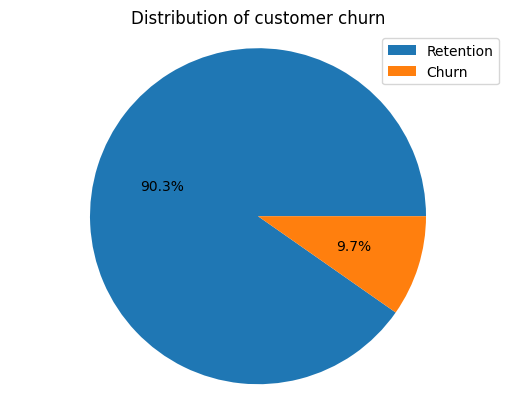

In [20]:
plt.title("Distribution of customer churn")
plt.pie(client_df.churn.value_counts(), autopct='%1.1f%%')
plt.axis('equal')
plt.legend(['Retention','Churn'],loc='upper right')
plt.show()

Let's look at parts of the dataset

#### Channel sales:

Starting with channel sales, let's look at the distribution of sales from each channel and it's % churn. Let's make a new dataframe for an abstracted view.

In [21]:
channel_sales = client_df[['id', 'channel_sales',  'churn']]
channel_sales.head()

,id,channel_sales,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0


To look at the distribution of churn and sales, we can group channels sales and churn by id.

In [22]:
channel_sales_grouped = channel_sales.groupby([channel_sales['channel_sales'], channel_sales['churn']])['id']

In [23]:
channel_sales_grouped.count()

channel_sales                     churn
MISSING                           0        3442
                                  1         283
epumfxlbckeskwekxbiuasklxalciiuu  0           3
ewpakwlliwisiwduibdlfmalxowmwpci  0         818
                                  1          75
fixdbufsefwooaasfcxdxadsiekoceaa  0           2
foosdfpfkusacimwkcsosbicdxkicaua  0        5934
                                  1         820
lmkebamcaaclubfxadlmueccxoimlema  0        1740
                                  1         103
sddiedcslfslkckwlfkdpoeeailfpeds  0          11
usilxuppasemubllopkaafesmlibmsdf  0        1237
                                  1         138
Name: id, dtype: int64

A stacked bar plot would better represent this,

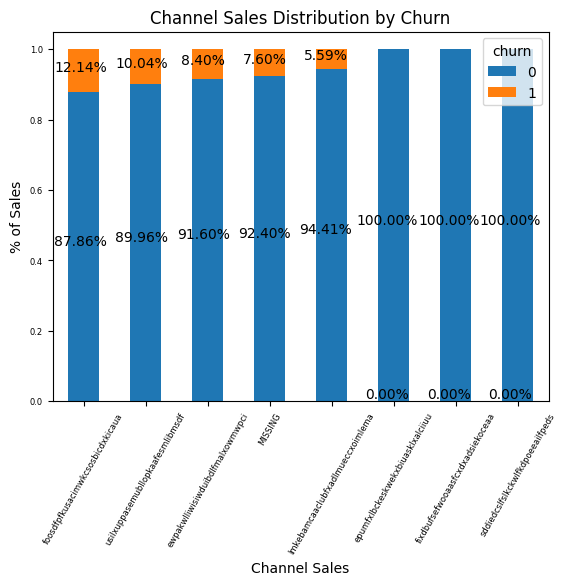

In [24]:
# Create a crosstab of channel_sales and churn
crosstab = pd.crosstab(channel_sales['channel_sales'], channel_sales['churn'])

# Normalize the crosstab to get percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Calculate churn percentage for each channel and sort
churn_percentage = crosstab_pct[1]
sorted_channels = churn_percentage.sort_values(ascending=False).index

# Reorder crosstab rows based on sorted channel list
crosstab_pct_sorted = crosstab_pct.loc[sorted_channels]

# Create a stacked bar chart
ax = crosstab_pct_sorted.plot(kind='bar', stacked=True, rot = 60, fontsize = 6)

# Add percentage labels to the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height() * 100:.2f}%',
                ((i.get_x() + i.get_width() / 2) * 0.99 - 0.05, (i.get_y() + i.get_height() / 2) * 0.99),
                ha='center', va='bottom')

# Add labels and title
plt.title('Channel Sales Distribution by Churn')
plt.xlabel('Channel Sales')
plt.ylabel('% of Sales')
plt.show()


We can see that 5 sales channels contribute to customer churn. Channel code: `foosdfpfkusacimwkcsosbicdxkicaua` has the most churn percentage. Also, the "MISSING" channel has 7.6% churn.

#### Consumption:




Next, we look at how consumptions affect customer churn, we will again create a new dataframe for this named `consumption`.

In [25]:
consumption = client_df[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "churn"]]
consumption.head()

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,0


Let's create a function to plot stacked histograms for each of the numeric features to visualize the distribution of each feature.

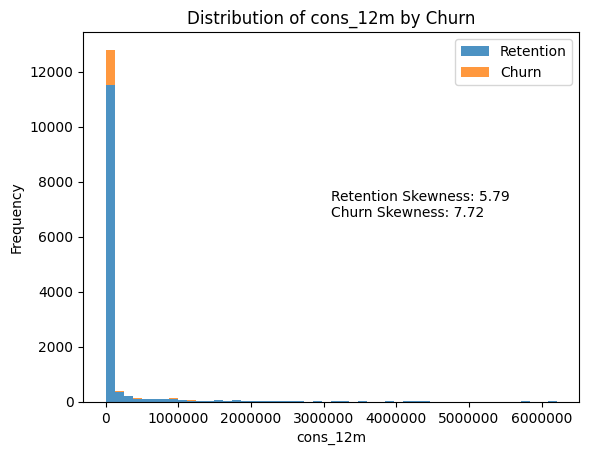

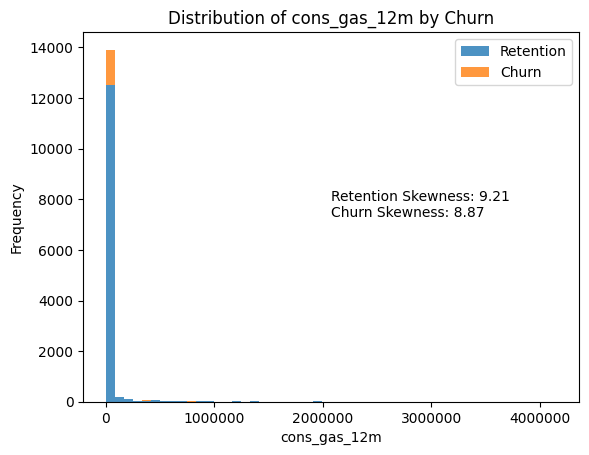

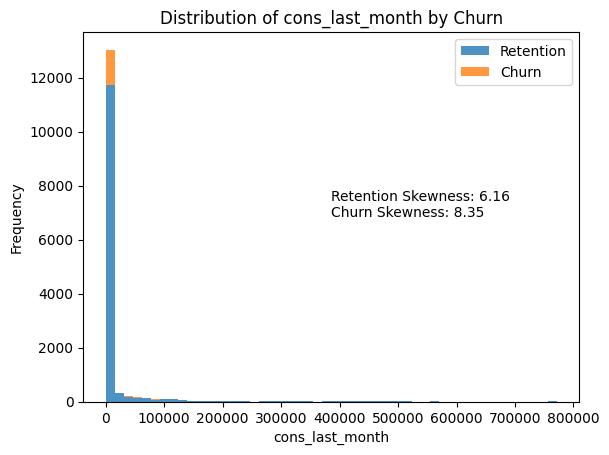

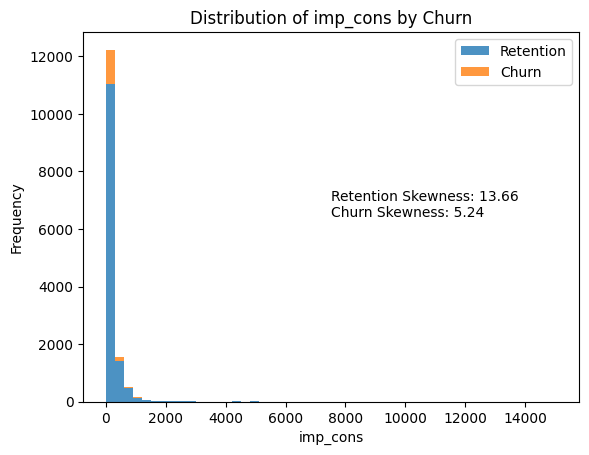

In [26]:
def hist_by_churn(dataframe, cols):
    for i, col in enumerate(cols):
        # Create a temporal dataframe with the data to be plotted
        temp = pd.DataFrame({
            "Retention": dataframe[dataframe["churn"] == 0][col],
            "Churn": dataframe[dataframe["churn"] == 1][col]
        })

        fig, ax = plt.subplots()

        # Plot histograms for Retention and Churn
        temp[["Retention", "Churn"]].plot(kind='hist', bins=50, stacked=True, alpha=0.8, ax=ax)

        # Add skewness information to the plot
        plt.text(0.5, 0.5, f'Retention Skewness: {temp["Retention"].skew():.2f}\nChurn Skewness: {temp["Churn"].skew():.2f}', transform=ax.transAxes)
        plt.xlabel(col)

        # Change the x-axis to plain style
        plt.gca().ticklabel_format(style='plain', axis='x')
        plt.title(f'Distribution of {col} by Churn')
        plt.show()

hist_by_churn(consumption, consumption.columns[1:-1])


The graphs are highly positively skewed. There is a long tail towards the higher values of consumption implying that there are less clients that consume a lot of gas or electricity. Same can be said for churning, clients consuming less amounts of electricity and gas seem to churn more than clients consuming high amounts of gas and electricity.

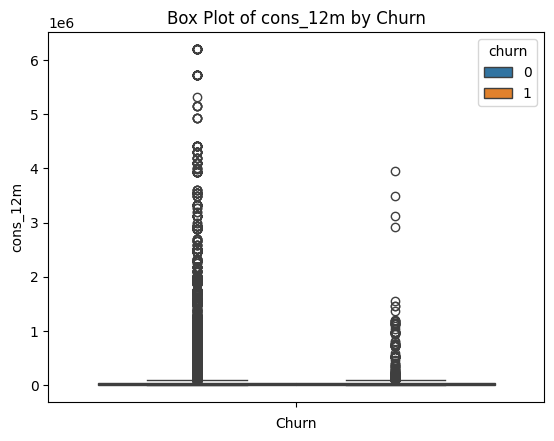

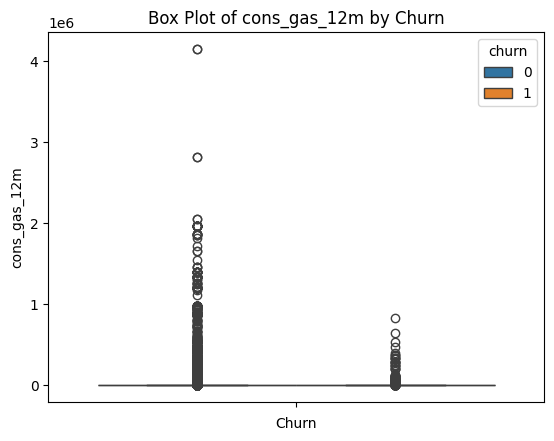

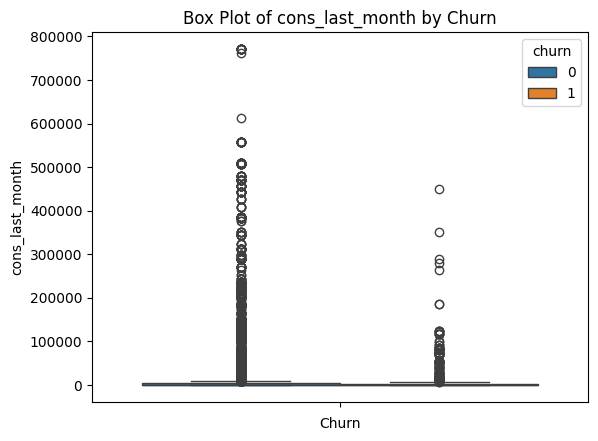

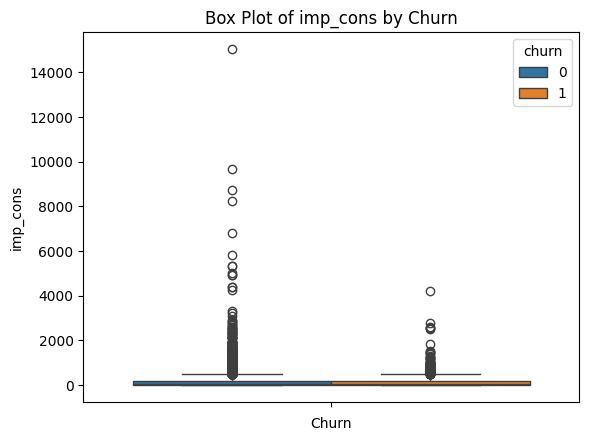

In [27]:
for col in consumption.columns:
    if col != "id" and col != "churn":
        plt.figure()
        sns.boxplot(y=consumption[col], hue =consumption['churn'])
        plt.title(f'Box Plot of {col} by Churn')
        plt.ylabel(col)
        plt.xlabel('Churn')
        plt.show()


It can be seen from the graph that there are many outliers in the dataset, we'll be handling those later.

#### Contract:

For contract, we will be making two different dataframes one for contract duration and another for contract type.

##### Contract Duration:

This dataframe will contain features relevant to duration of contract including `date_activ`, `date_end`, `date_modif_prod`, `date_renewal`.

In [28]:
contract = client_df[["id", "date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"]]
contract.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1
1,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0
2,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0
3,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0
4,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0


Let's add new features `contract_days`, `contract_months` and `contract_years`  to display duration of contract in years, months and days. `total_days`  will have the duration of contract in days.

In [29]:
def date_diff(date1, date2):
  diff = date2 - date1
  return int(diff.days / 365), int(diff.days % 365 / 30), int(diff.days % 365 % 30), diff.days

contract['contract_years'], contract['contract_months'], contract['contract_days'], contract['total_days']= zip(*contract.apply(lambda row: date_diff(row['date_activ'], row['date_end']), axis=1))

contract.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn,contract_years,contract_months,contract_days,total_days
0,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1,3,0,1,1096
1,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0,7,0,11,2566
2,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0,6,0,2,2192
3,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0,6,0,2,2192
4,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0,6,1,25,2245


Making a new feature that'd divide the contract duration in 3 parts. The first part will be start of contract, the second part will be mid contract and end of the contract. This categorization will help us generalize when the contract was modified.

In [30]:
def categorize_date_modif(start, end, modif):
    duration = end - start

    # Divide the duration of the contract into three equal parts
    part_duration = duration / 3

    # Calculate the dates corresponding to x3 and x4
    x3 = start + part_duration
    x4 = start + 2 * part_duration

    # Determine whether the modification date falls into the start, mid, or end part of the contract period
    if modif < x3:
        return 'start'
    elif modif >= x3 and modif < x4:
        return 'mid'
    else:
        return 'end'

contract["contract_modification"] = contract.apply(lambda row: categorize_date_modif(row["date_activ"], row["date_end"], row["date_modif_prod"]), axis=1)
contract.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,churn,contract_years,contract_months,contract_days,total_days,contract_modification
0,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1,3,0,1,1096,end
1,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0,7,0,11,2566,start
2,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0,6,0,2,2192,start
3,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0,6,0,2,2192,start
4,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0,6,1,25,2245,start


Let's visualize distribution of churn and duration of contract in days.

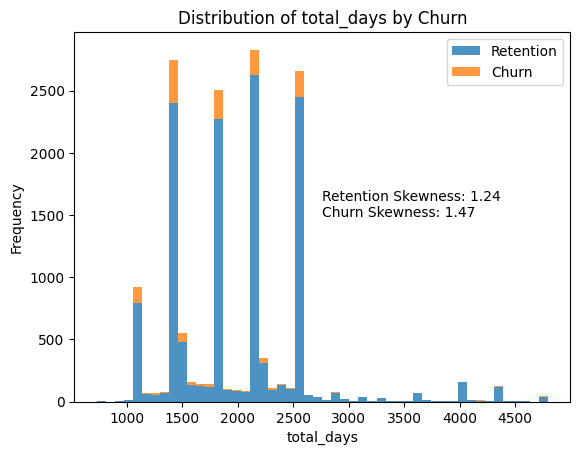

In [31]:
hist_by_churn(contract, contract[["total_days"]].columns)

We can again see that it is a bit positive suggesting that customers with longer contracts don't seem to churn.

Let's check if churn is based of contract modification.

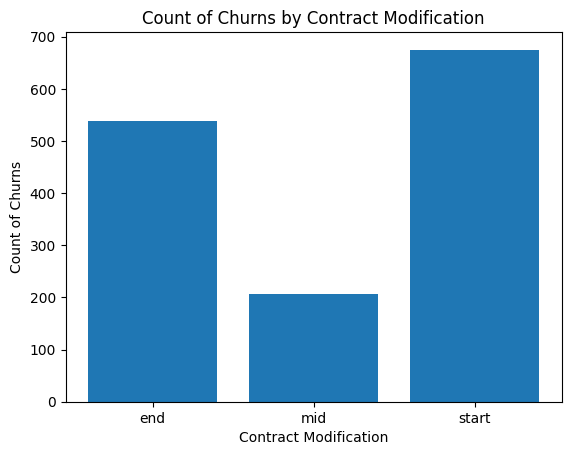

In [32]:
churn_counts = contract[contract['churn'] == 1].groupby('contract_modification').size()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Contract Modification')
plt.ylabel('Count of Churns')
plt.title('Count of Churns by Contract Modification')
plt.show()

We can see that there is more churning if the contract was modified by the start of contract or towards the end of contract. Thought this cannot be verified properly since there is churn for if the contract was modified mid contract period.

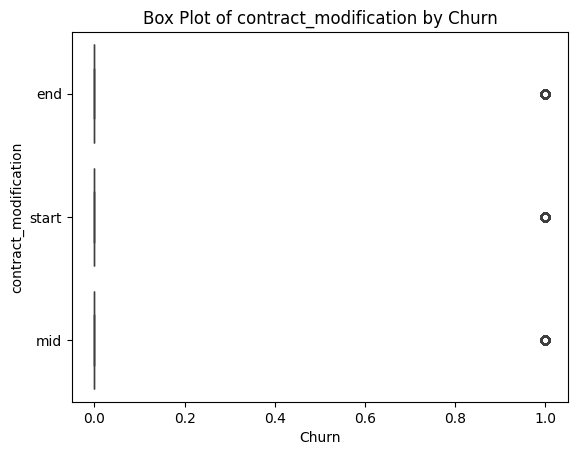

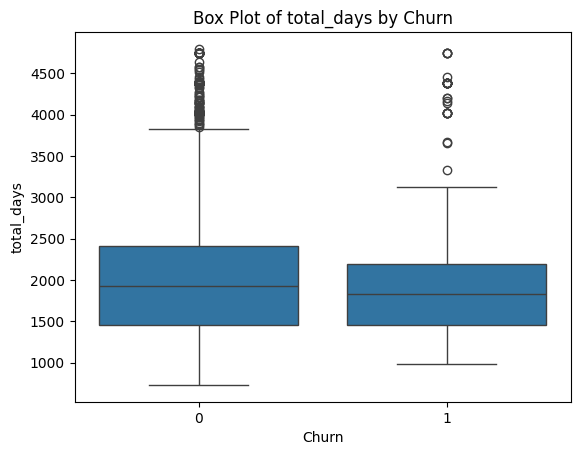

In [33]:
for col in ['contract_modification', 'total_days']:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=contract)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()

There are a lot of outliers, we will be cleaning those later.

##### Contract type:

Making new dataframe for contract type.

In [34]:
contract_type = client_df[["id", "has_gas", "churn"]]
contract_type.head()

,id,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,0
2,764c75f661154dac3a6c254cd082ea7d,0,0
3,bba03439a292a1e166f80264c16191cb,0,0
4,149d57cf92fc41cf94415803a877cb4b,0,0


There are two types of contracts ones that use both gas amd electricity and other that are only subscribed to electricity.

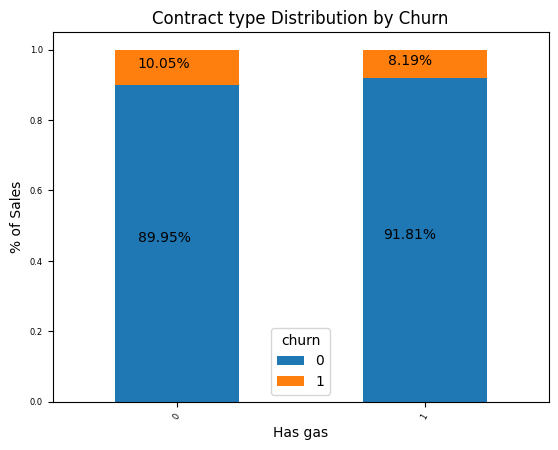

In [35]:
# Create a crosstab of has_gas and churn
crosstab = pd.crosstab(contract_type['has_gas'], contract_type['churn'])

# Normalize the crosstab to get percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Calculate churn percentage for each channel and sort
churn_percentage = crosstab_pct[1]
sorted_channels = churn_percentage.sort_values(ascending=False).index

# Reorder crosstab rows based on sorted channel list
crosstab_pct_sorted = crosstab_pct.loc[sorted_channels]

# Create a stacked bar chart
ax = crosstab_pct_sorted.plot(kind='bar', stacked=True, rot = 60, fontsize = 6)

# Add percentage labels to the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height() * 100:.2f}%',
                ((i.get_x() + i.get_width() / 2) * 0.99 - 0.05, (i.get_y() + i.get_height() / 2) * 0.99),
                ha='center', va='bottom')

# Add labels and title
plt.title('Contract type Distribution by Churn')
plt.xlabel('Has gas')
plt.ylabel('% of Sales')
plt.show()


The distribution of churn among both types of contracts is almost the same.

#### Forecast:

We make a new dataframe for forecast variables.

In [36]:
forecast = client_df[["id", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_off_peak", "forecast_price_energy_peak", "forecast_price_pow_off_peak", "churn"]]
forecast.head()

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
2,764c75f661154dac3a6c254cd082ea7d,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
3,bba03439a292a1e166f80264c16191cb,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
4,149d57cf92fc41cf94415803a877cb4b,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0


Plotting distribution of forecast by churn.

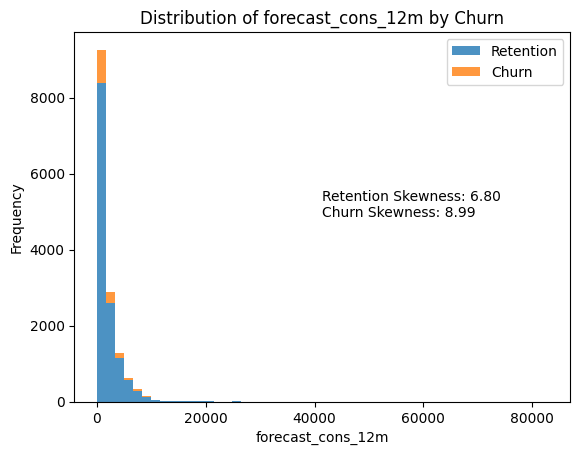

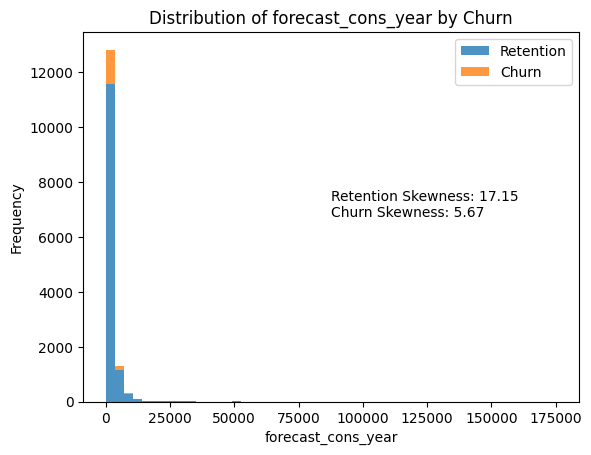

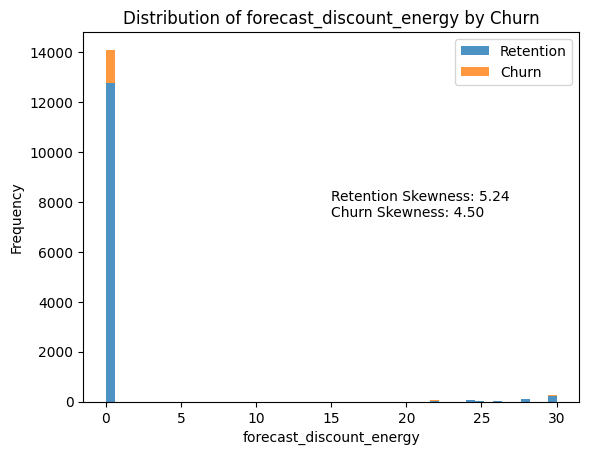

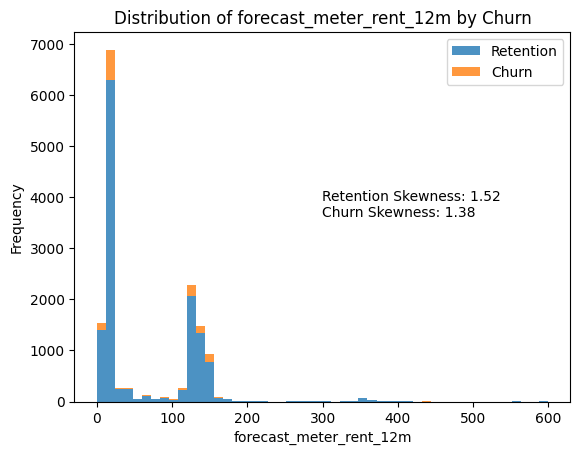

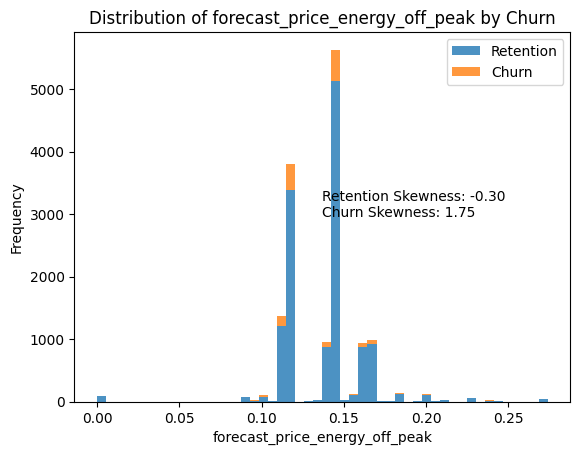

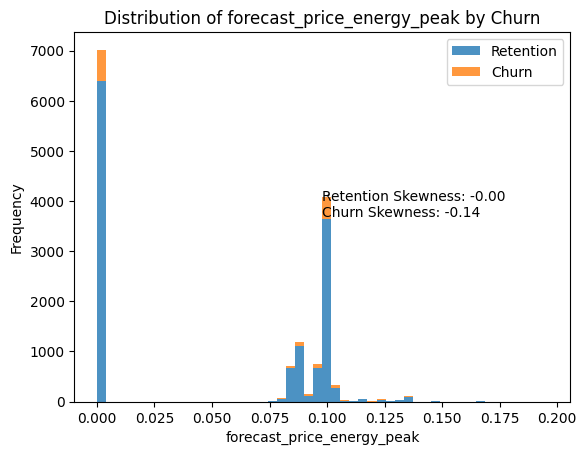

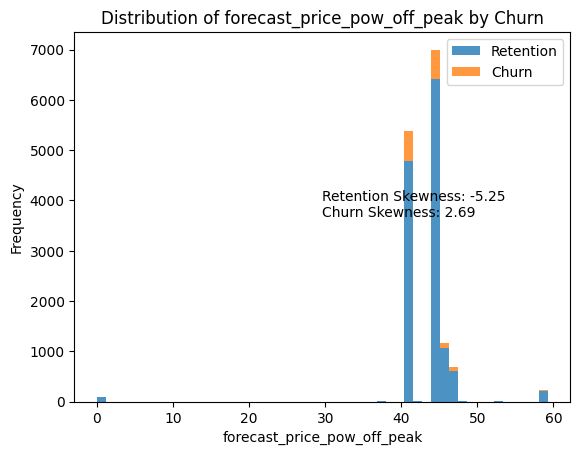

In [37]:
hist_by_churn(forecast, forecast.columns[1:-1])

We can see that the distribution of forecast features is highly positive, we will be addressing this later.

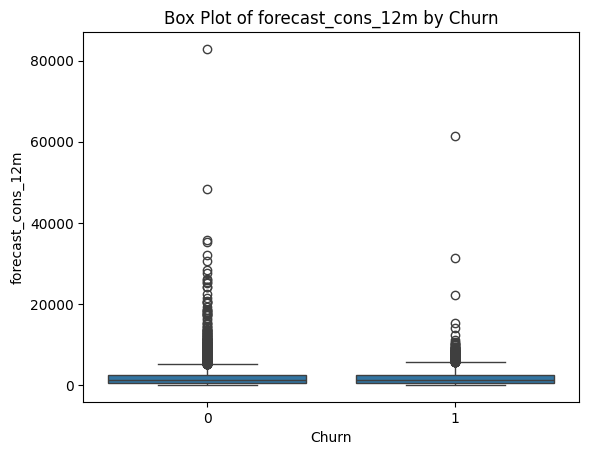

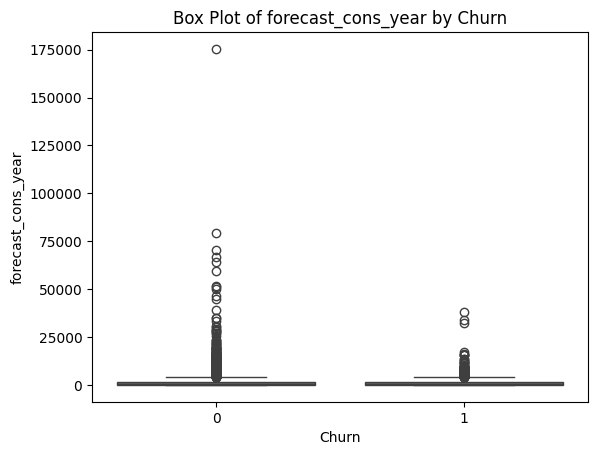

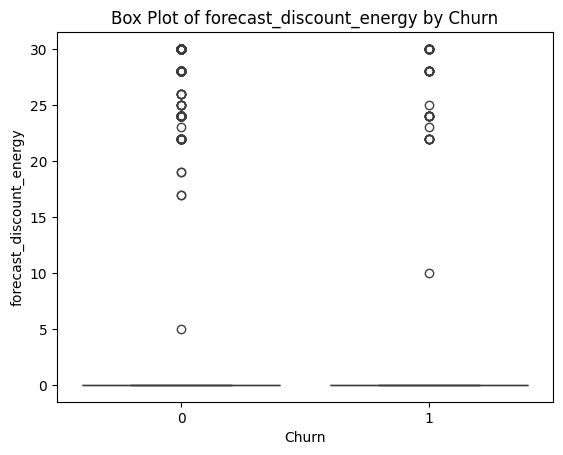

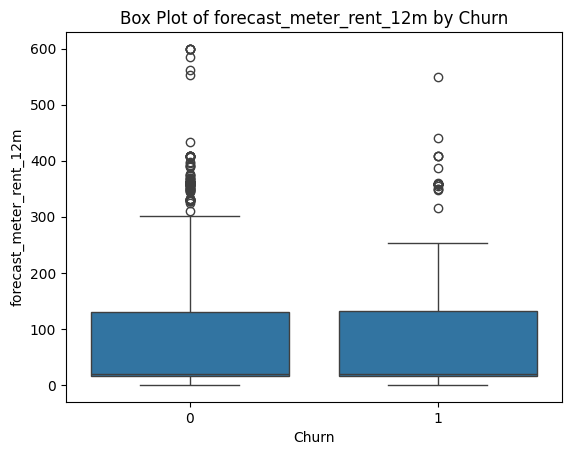

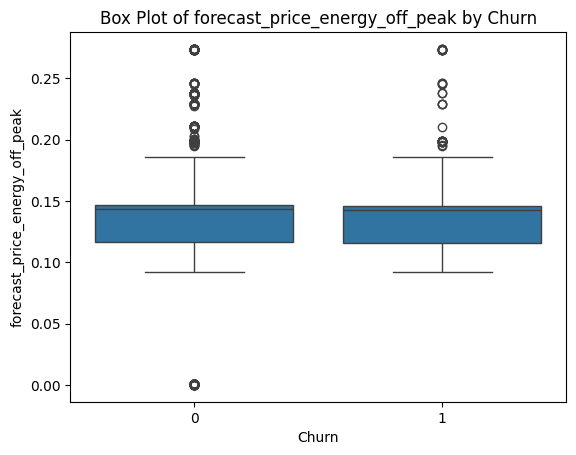

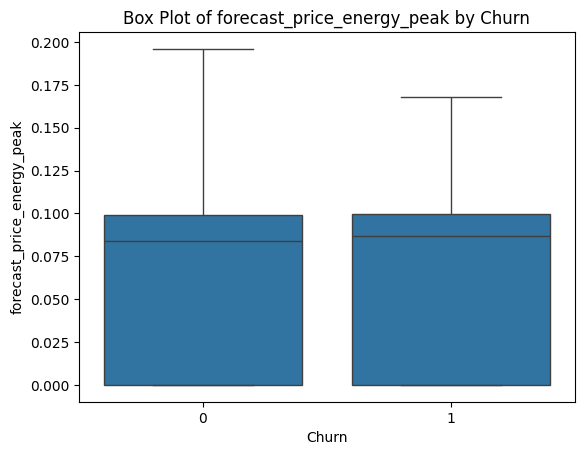

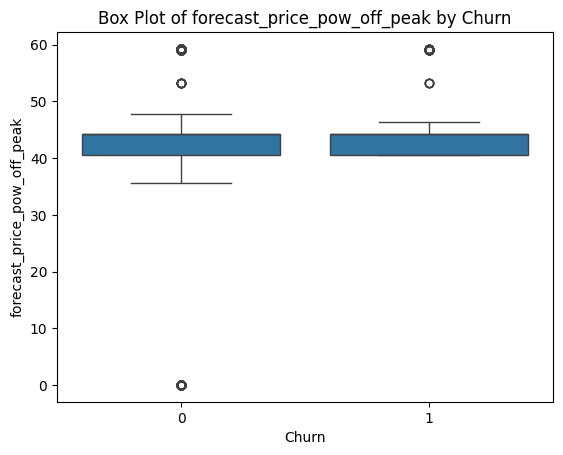

In [38]:
for col in forecast.columns[1:-1]:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=forecast)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()


There are a high number of outliers in the dataset.

#### Margin:

Making a new dataframe for margin analysis.

In [39]:
margin = client_df[["id", "margin_gross_pow_ele", "margin_net_pow_ele", "net_margin", "churn"]]
margin.head()

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin,churn
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99,1
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89,0
2,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60,0
3,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46,0
4,149d57cf92fc41cf94415803a877cb4b,44.91,44.91,47.98,0


Plotting distribution of margin variables by churn.

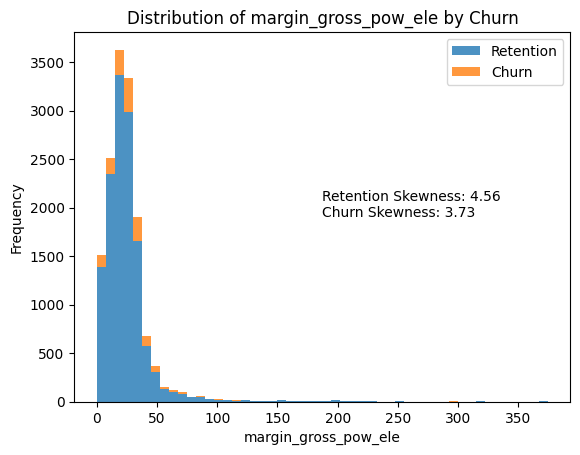

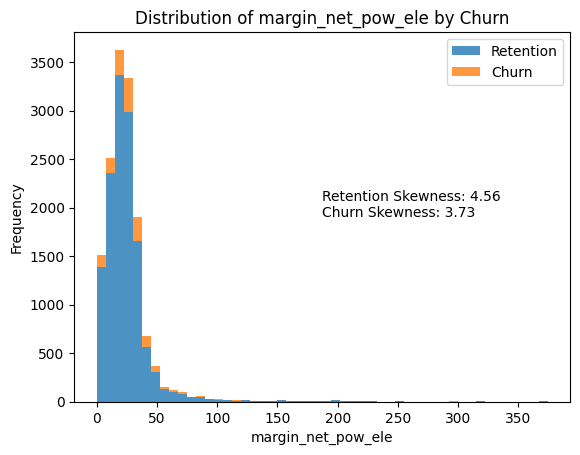

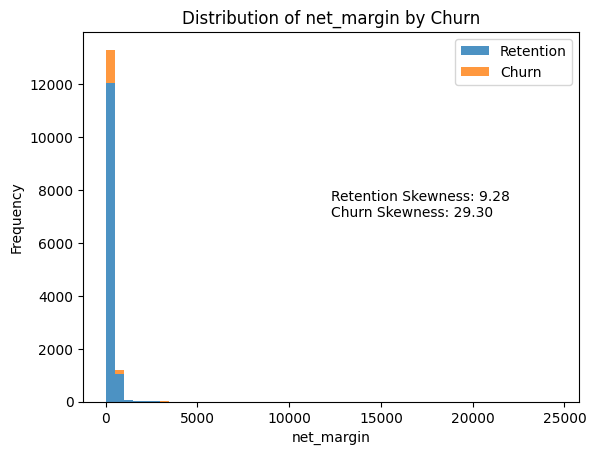

In [40]:
hist_by_churn(margin, margin.columns[1:-1])

We can see that the variables are highly positively skewed, also distribution of churn in `net_margin` shows high positive skewness which may suggest high correlation.

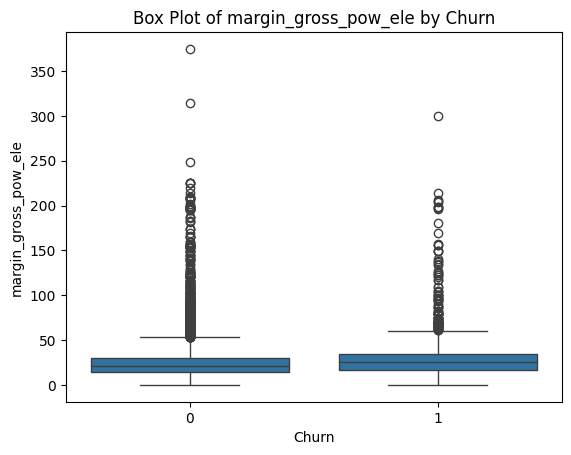

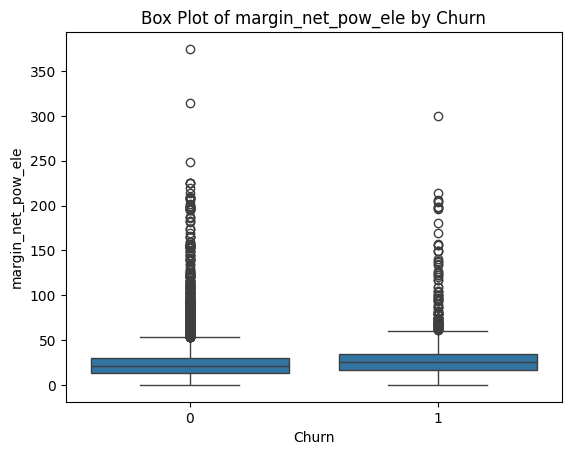

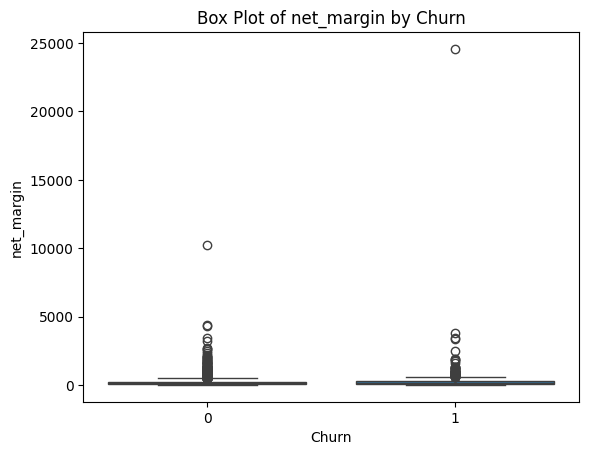

In [41]:
for col in margin.columns[1:-1]:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=margin)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()


The dataset has a lot of outliers.

#### Power:

Creating new dataset for power consumption.

In [42]:
power = client_df[["id", "pow_max", "churn"]]
power.head()

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,13.856,0
3,bba03439a292a1e166f80264c16191cb,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,19.800,0


Plotting distribution of `pow_max` by `churn`.

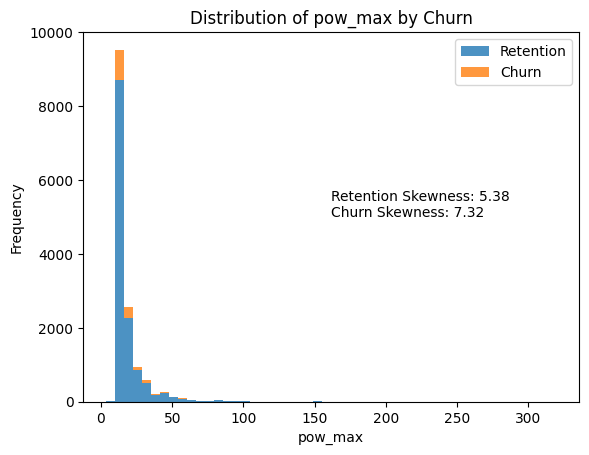

In [43]:
hist_by_churn(power, power.columns[1:-1])

We can see that the distribution shows high positive skewness.

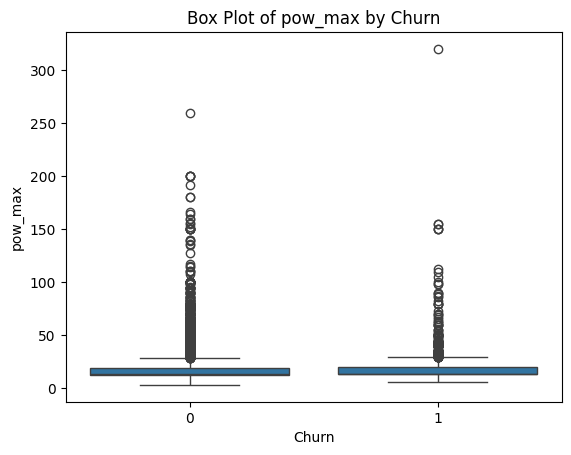

In [44]:
for col in power.columns[1:-1]:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=power)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()

There are a lot of outliers in the dataset.

#### Prices:

Let's check how much data we have.

In [45]:
price_df["id"].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

We can see that most clients have data of about 12 months.

In [46]:
price_df["price_date"].value_counts().sort_index()

2015-01-01    16070
2015-02-01    16082
2015-03-01    16074
2015-04-01    16079
2015-05-01    16080
2015-06-01    16085
2015-07-01    16090
2015-08-01    16094
2015-09-01    16082
2015-10-01    16085
2015-11-01    16087
2015-12-01    16094
Name: price_date, dtype: int64

Every client has data from December 2015 and August 2015.

Let's create a new dataframe for analysis of price data.

In [47]:
prices = price_df[["id", "price_off_peak_var", "price_peak_var", "price_mid_peak_var", "price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"]]
prices.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0


Plotting distribution of prices.

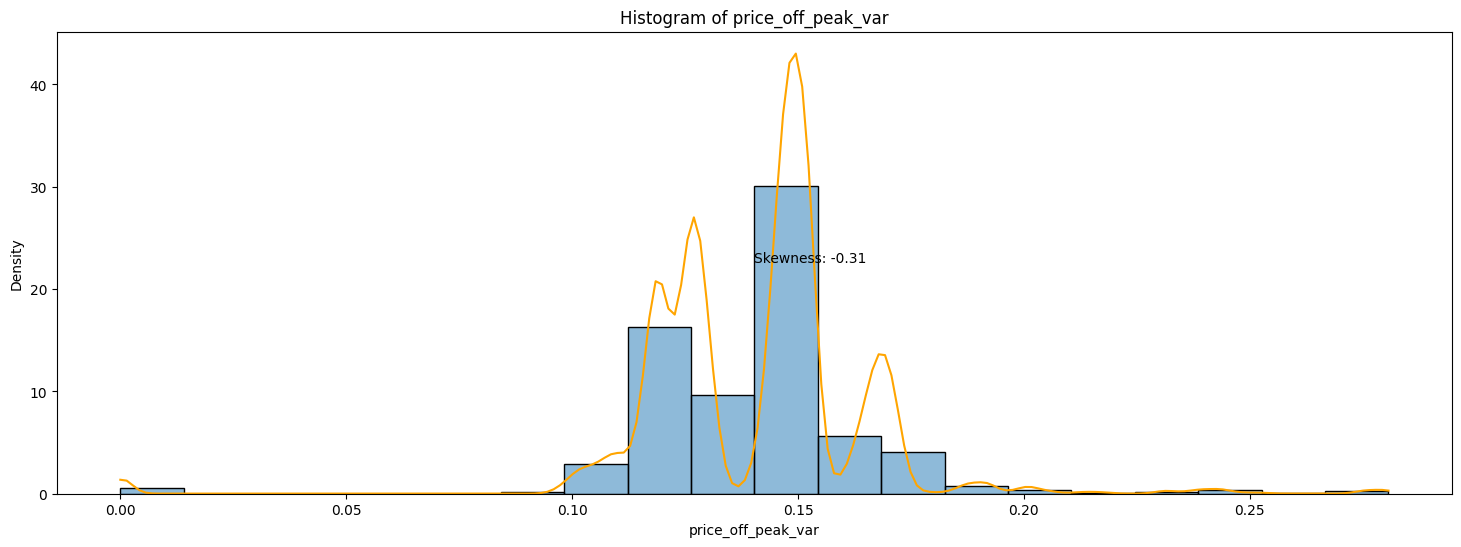

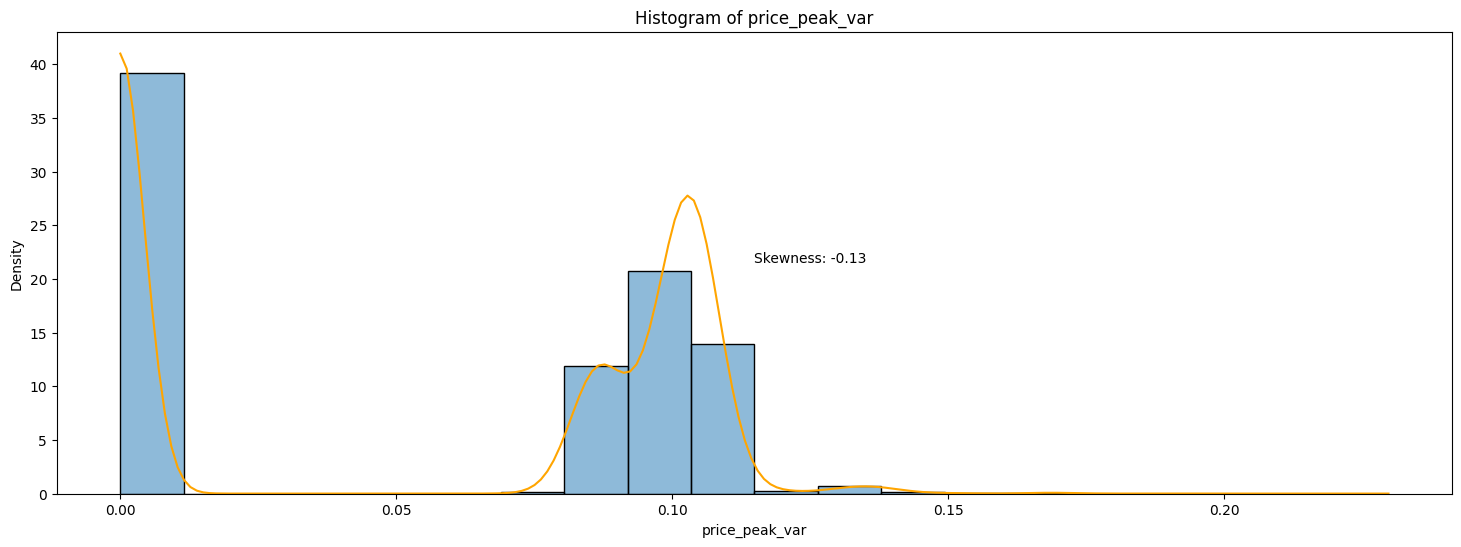

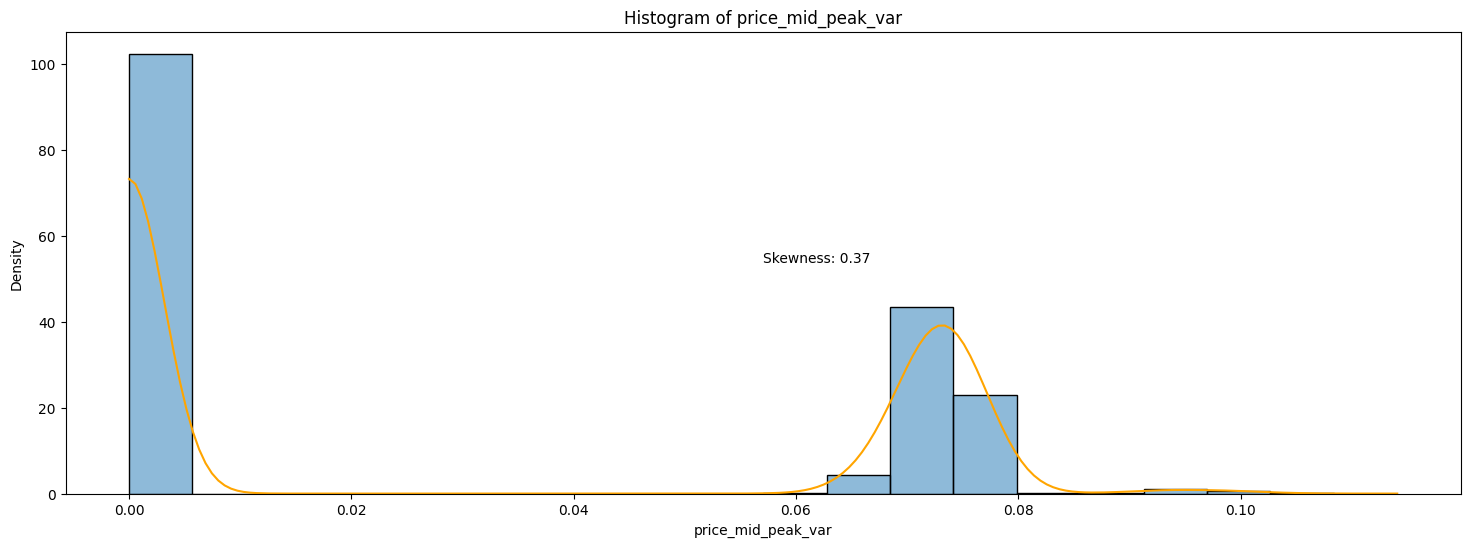

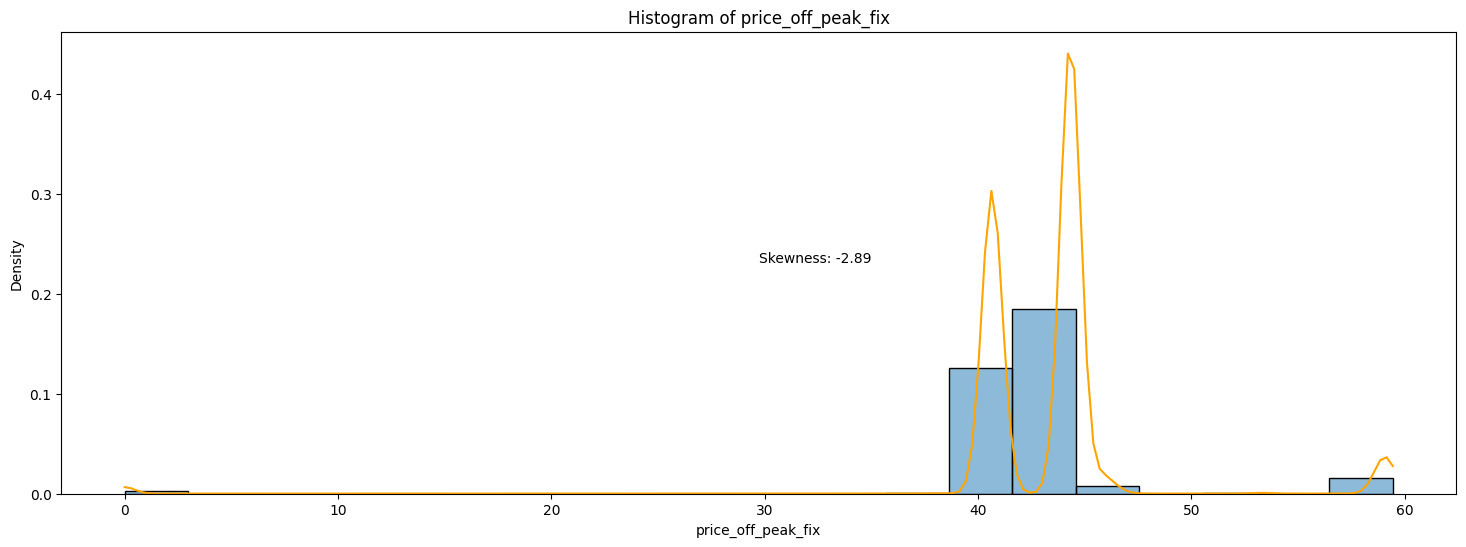

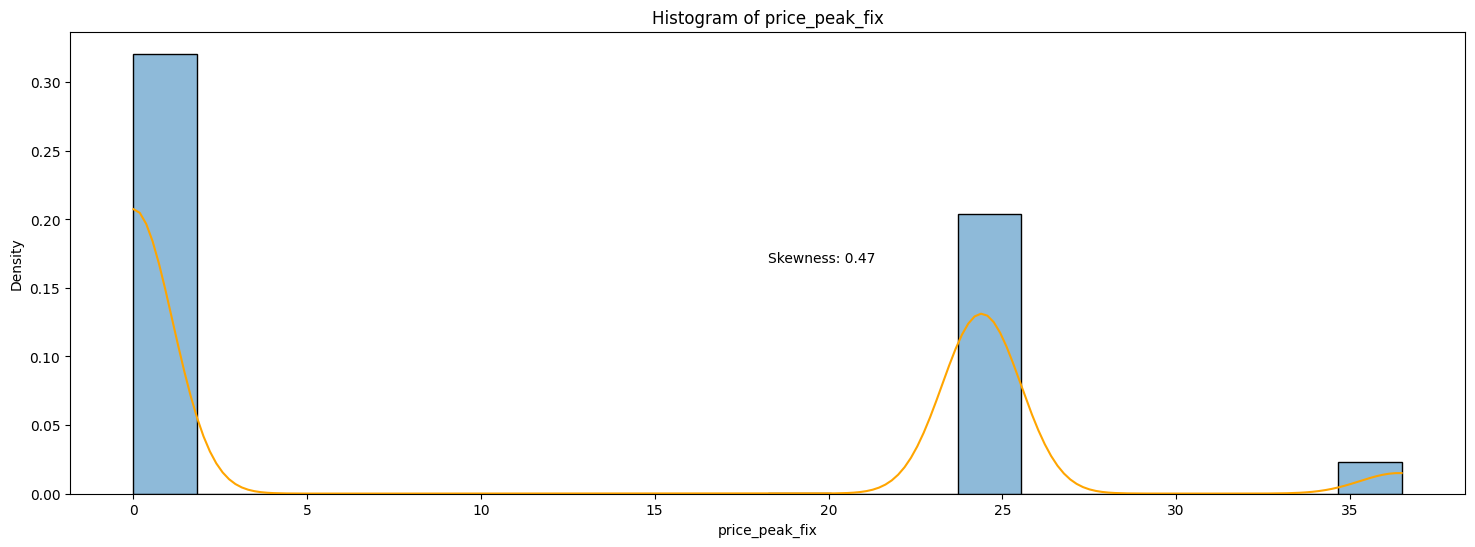

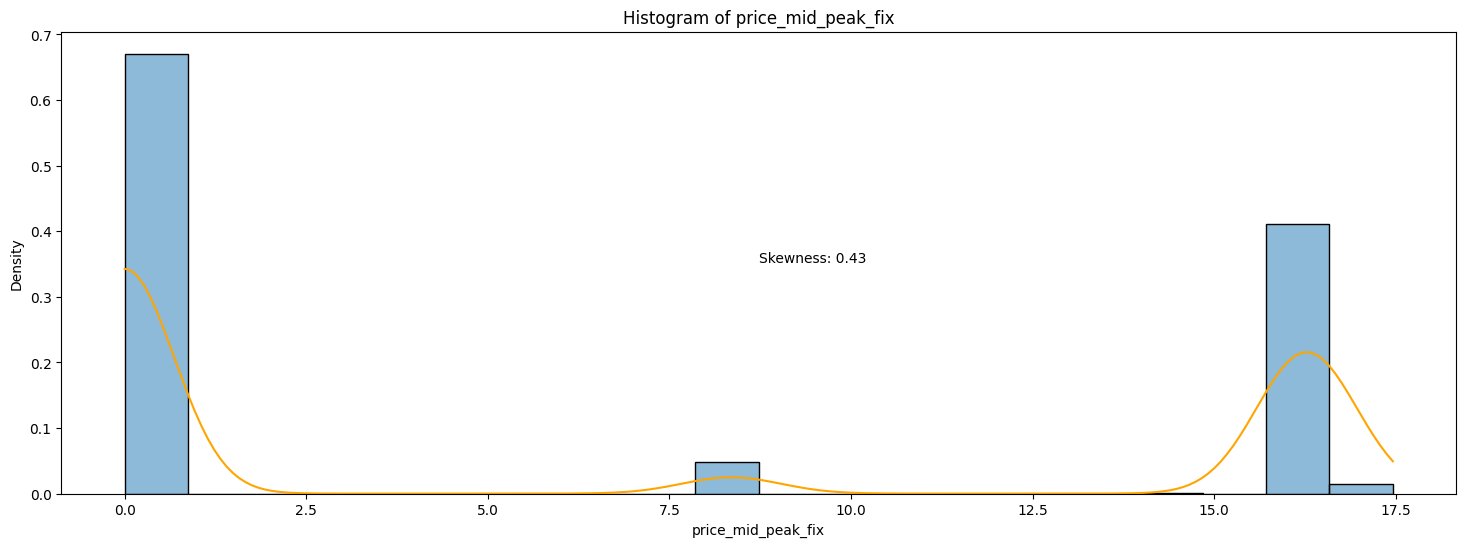

In [48]:
for col in prices.columns[1:]:
    plt.figure(figsize=(18, 6))
    histplot = sns.histplot(prices[col], bins=20, kde=True, stat="density")
    histplot.get_lines()[0].set_color("orange")

    plt.text(0.5, 0.5, f"Skewness: {prices[col].skew():.2f}", transform=plt.gca().transAxes)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


The distribution of price data seems very normal.

#### Others:

Analysis of the rest of the columns.

##### Antiquity:

Let's make a new dataframe to analyze antiquity.

In [49]:
antiquity = client_df[["id", "num_years_antig", "churn"]]
antiquity.head()

,id,num_years_antig,churn
0,24011ae4ebbe3035111d65fa7c15bc57,3,1
1,d29c2c54acc38ff3c0614d0a653813dd,6,0
2,764c75f661154dac3a6c254cd082ea7d,6,0
3,bba03439a292a1e166f80264c16191cb,6,0
4,149d57cf92fc41cf94415803a877cb4b,6,0


Plotting distribution of antiquity by churn.

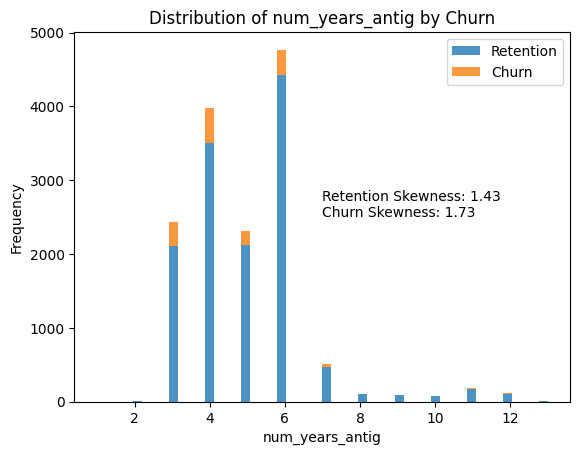

In [50]:
hist_by_churn(antiquity, antiquity.columns[1:-1])

We can see that the distribution of the column is positive and same is seen with churn distribution.

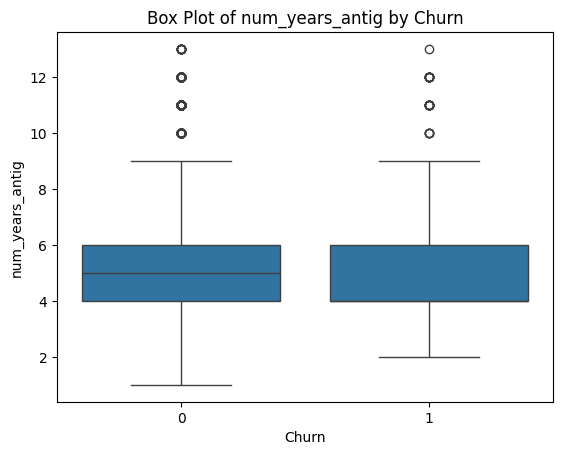

In [51]:
for col in antiquity.columns[1:-1]:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=antiquity)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()


There are a few outliers in this dataset.

##### Original electricity campaign:

Creating new dataframe for origin_up.

In [52]:
origin_up = client_df[["id", "origin_up", "churn"]]
origin_up.head()

,id,origin_up,churn
0,24011ae4ebbe3035111d65fa7c15bc57,lxidpiddsbxsbosboudacockeimpuepw,1
1,d29c2c54acc38ff3c0614d0a653813dd,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
2,764c75f661154dac3a6c254cd082ea7d,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
3,bba03439a292a1e166f80264c16191cb,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
4,149d57cf92fc41cf94415803a877cb4b,kamkkxfxxuwbdslkwifmmcsiusiuosws,0


Plotting distribution of `origin_up` by `churn`.

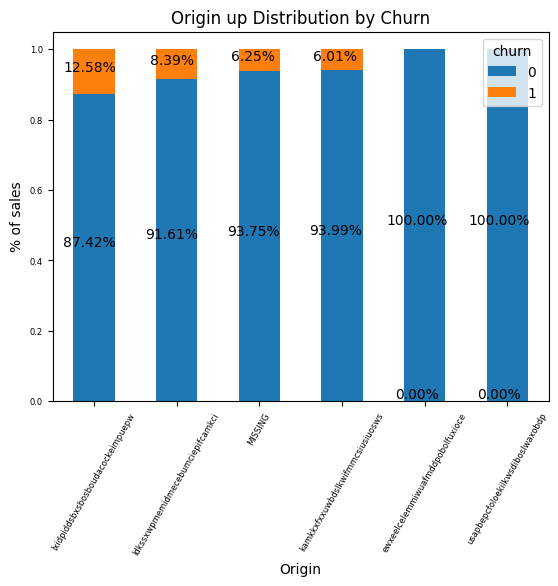

In [53]:
# Create a crosstab of origin_up and churn
crosstab = pd.crosstab(origin_up['origin_up'], origin_up['churn'])

# Normalize the crosstab to get percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)

# Calculate churn percentage for each channel and sort
churn_percentage = crosstab_pct[1]
sorted_channels = churn_percentage.sort_values(ascending=False).index

# Reorder crosstab rows based on sorted channel list
crosstab_pct_sorted = crosstab_pct.loc[sorted_channels]

# Create a stacked bar chart
ax = crosstab_pct_sorted.plot(kind='bar', stacked=True, rot = 60, fontsize = 6)

# Add percentage labels to the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height() * 100:.2f}%',
                ((i.get_x() + i.get_width() / 2) * 0.99 - 0.05, (i.get_y() + i.get_height() / 2) * 0.99),
                ha='center', va='bottom')

# Add labels and title
plt.title('Origin up Distribution by Churn')
plt.xlabel('Origin')
plt.ylabel('% of sales')
plt.show()


We can see that only a few campaigns have churn rate with churn rate of `lxidpiddsbxsbosboudacockeimpuepw` being the highest.

##### Active products and Services:

Making a new dataframe for analysis of active products and services with churn.

In [54]:
atv_prods = client_df[["id", "nb_prod_act", "churn"]]
atv_prods.head()

,id,nb_prod_act,churn
0,24011ae4ebbe3035111d65fa7c15bc57,2,1
1,d29c2c54acc38ff3c0614d0a653813dd,1,0
2,764c75f661154dac3a6c254cd082ea7d,1,0
3,bba03439a292a1e166f80264c16191cb,1,0
4,149d57cf92fc41cf94415803a877cb4b,1,0


Plotting distribution of `nb_prob_act` by `churn`.

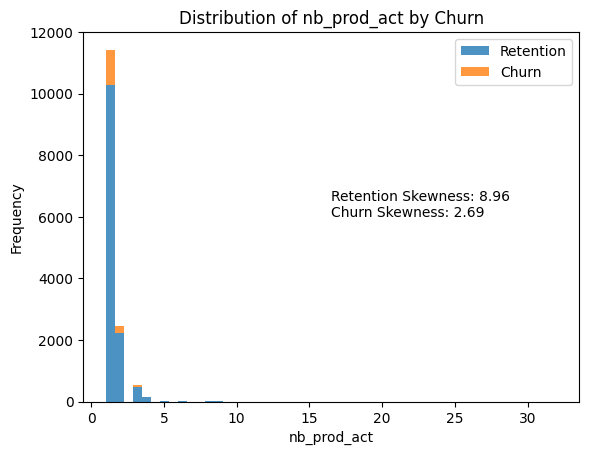

In [55]:
hist_by_churn(atv_prods, atv_prods.columns[1:-1])

We can see a highly positive distribution of this variable. We also see  that customers with lesser active products or services tend to churn more, but it may also be a result of the unbalanced dataset.

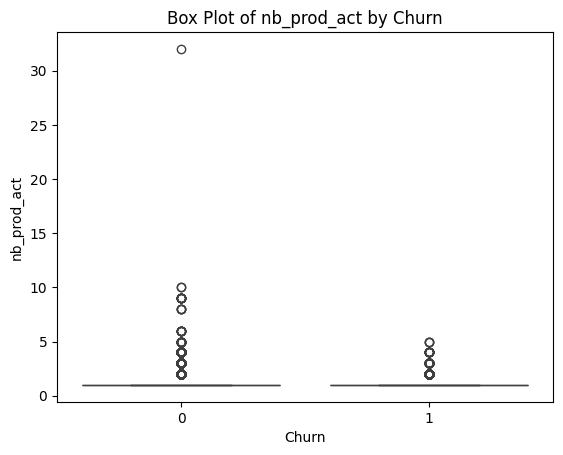

In [56]:
for col in atv_prods.columns[1:-1]:
    plt.figure()
    sns.boxplot(x='churn', y=col, data=atv_prods)
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} by Churn')
    plt.show()


There are a few outliers in the dataset.

### Investigation of Hypothesis:

The client's hypothesis suggests that customer churn is sensitive to pricing. Let's verify this hypothesis. If there is an increase in prices and the customer churns, we can conclude that churn is indeed price-sensitive. Conversely, if there is a decrease in prices or no change, yet the customer still churns, then we can infer that churn is not dependent on pricing.

We have data of each company for year 2015, we can use it to create new columns to measure price sensitivity using average of year, average of 6 months and average of 3 months.

In [57]:
# Replacing each id entry by mean of all the data for that id for that year
avg_year = price_df.groupby(["id"]).mean()
avg_year = avg_year.reset_index()
avg_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [58]:
# Replacing each id entry by mean of all the entries of that id for the last 6 months
avg_6m = price_df[price_df["price_date"].dt.month >= 7].groupby(["id"]).mean().reset_index()
avg_6m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [59]:
# Replacing each id entry by mean of all the entries of that id for the last 3 months
avg_3m = price_df[price_df["price_date"].dt.month >= 10].groupby(["id"]).mean().reset_index()
avg_3m.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000


Making new columns using existing columns by combining `var` and `fix`.

In [60]:
avg_year['price_off_peak'] = avg_year['price_off_peak_var'] + avg_year['price_off_peak_fix']
avg_year['price_peak'] = avg_year['price_peak_var'] + avg_year['price_peak_fix']
avg_year['price_mid_peak'] = avg_year['price_mid_peak_var'] + avg_year['price_mid_peak_fix']

avg_6m['price_off_peak'] = avg_6m['price_off_peak_var'] + avg_6m['price_off_peak_fix']
avg_6m['price_peak'] = avg_6m['price_peak_var'] + avg_6m['price_peak_fix']
avg_6m['price_mid_peak'] = avg_6m['price_mid_peak_var'] + avg_6m['price_mid_peak_fix']

avg_3m['price_off_peak'] = avg_3m['price_off_peak_var'] + avg_3m['price_off_peak_fix']
avg_3m['price_peak'] = avg_3m['price_peak_var'] + avg_3m['price_peak_fix']
avg_3m['price_mid_peak'] = avg_3m['price_mid_peak_var'] + avg_3m['price_mid_peak_fix']

Renaming the columns accordingly.

In [61]:
avg_3m.rename(columns={col: f'mean_3m_{col}' for col in avg_3m.columns if col != 'id'}, inplace=True)
avg_6m.rename(columns={col: f'mean_6m_{col}' for col in avg_6m.columns if col != 'id'}, inplace=True)
avg_year.rename(columns={col: f'mean_12m_{col}' for col in avg_year.columns if col != 'id'}, inplace=True)

Let's combine all the dataframes into one

In [62]:
processed_prices = pd.merge(avg_year, avg_6m, on='id')
processed_prices = pd.merge(processed_prices, avg_3m, on='id')
processed_prices.head()

,id,mean_12m_price_off_peak_var,mean_12m_price_peak_var,mean_12m_price_mid_peak_var,mean_12m_price_off_peak_fix,mean_12m_price_peak_fix,mean_12m_price_mid_peak_fix,mean_12m_price_off_peak,mean_12m_price_peak,mean_12m_price_mid_peak,...,mean_6m_price_mid_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's add the churn feature to this dataset.

In [63]:
prices_with_churn = pd.merge(processed_prices, client_df[["id", "churn"]], on = "id")
prices_with_churn.head()

,id,mean_12m_price_off_peak_var,mean_12m_price_peak_var,mean_12m_price_mid_peak_var,mean_12m_price_off_peak_fix,mean_12m_price_peak_fix,mean_12m_price_mid_peak_fix,mean_12m_price_off_peak,mean_12m_price_peak,mean_12m_price_mid_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


Let's plot a heatmap to verify correlation between churn and all the price variables.

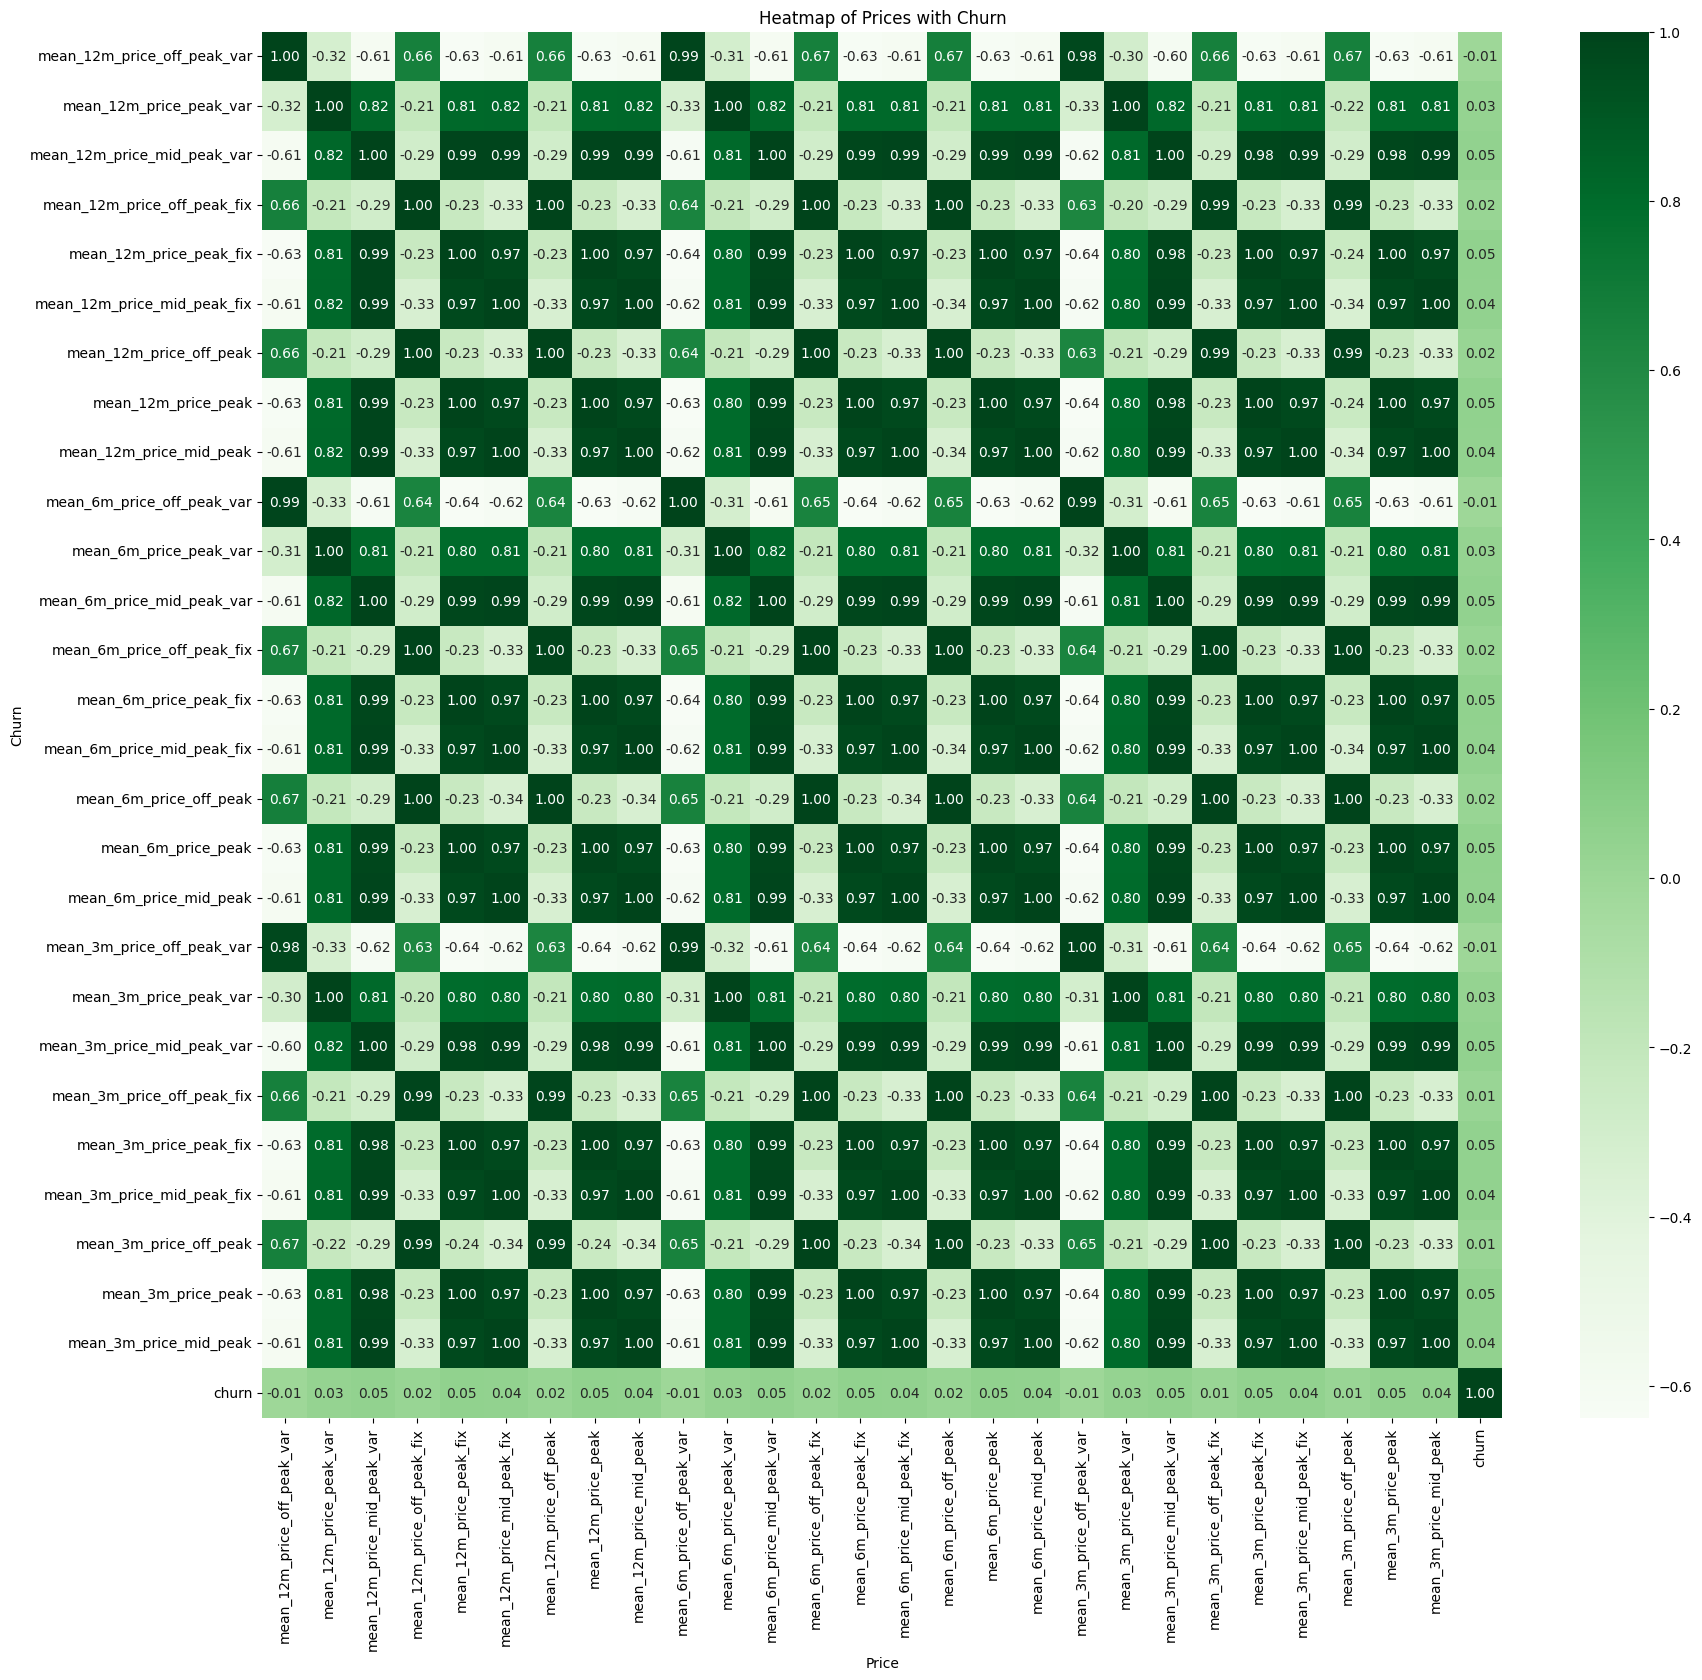

In [64]:
plt.figure(figsize=(20, 18))
sns.heatmap(prices_with_churn.corr(), cmap="Greens", annot=True, fmt=".2f", annot_kws = {"size":10})
plt.title('Heatmap of Prices with Churn')
plt.xlabel('Price')
plt.ylabel('Churn')
plt.show()

We can clearly observe a high correlation among different price variables. However, when examining churn, there is barely any correlation between churn and other price variables. This suggests that churn is not sensitive to price, thereby indicating that the **hypothesis is incorrect**.

Let's combine the modified price dataframe with client_df for modelling stage.

In [65]:
final_df = pd.merge(client_df.drop(columns = ["churn"], axis = 1), prices_with_churn, on = "id")
final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.126997,0.095024,0.049213,41.908233,16.291553,10.861037,42.035230,16.386577,10.910249,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [66]:
final_df.shape

(14606, 53)

Let's export this to a csv file.

In [67]:
final_df.to_csv("final_data_of_churn.csv")